In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
# 1. Implement Activation Functions
def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def bipolar_sigmoid_function(x):
    return 2 / (1 + np.exp(-x)) - 1

def tanh_function(x):
    return np.tanh(x)

def relu_function(x):
    return np.maximum(0, x)

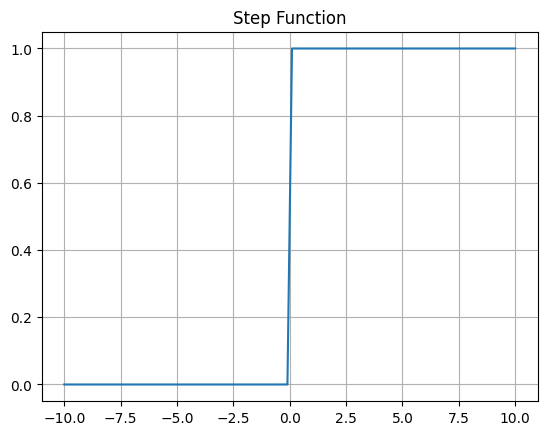

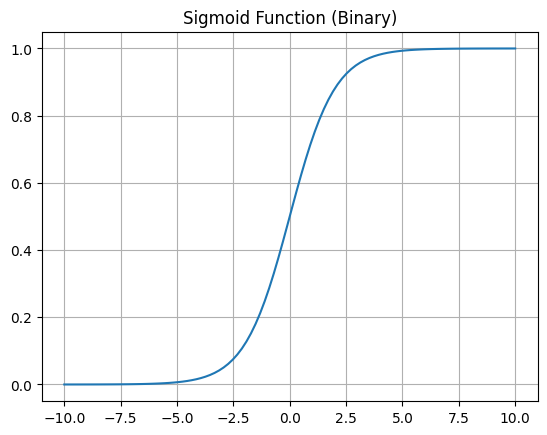

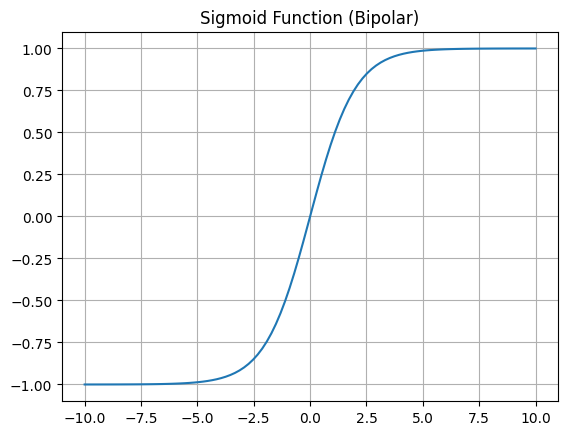

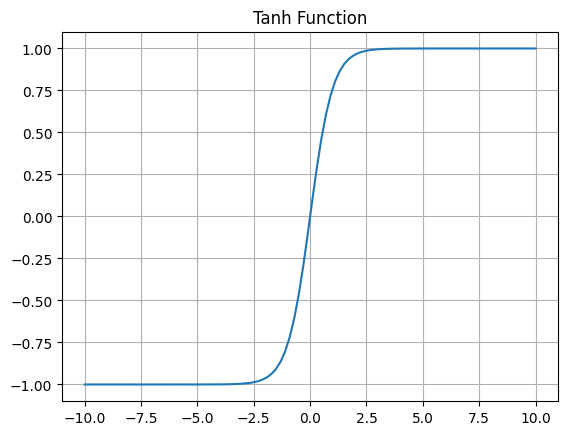

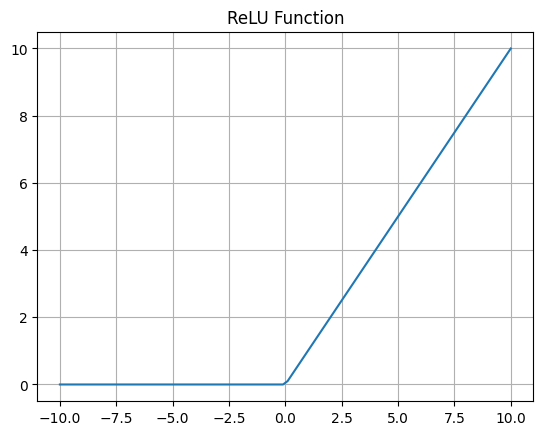

In [9]:
# 2. Visualize Activation Functions
def plot_activation_function(function, x, title):
    y = function(x)
    plt.plot(x, y)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Create input range for visualization
x = np.linspace(-10, 10, 100)

# Plotting different activation functions
plot_activation_function(step_function, x, 'Step Function')
plot_activation_function(sigmoid_function, x, 'Sigmoid Function (Binary)')
plot_activation_function(bipolar_sigmoid_function, x, 'Sigmoid Function (Bipolar)')
plot_activation_function(tanh_function, x, 'Tanh Function')
plot_activation_function(relu_function, x, 'ReLU Function')

In [5]:
# 3. Create XOR Dataset
X = torch.Tensor([[0,0], [0,1], [1,0], [1,1]])
y = torch.Tensor([[0], [1], [1], [0]])

In [6]:
# 4. Neural Network Model Definition
class SimpleNN(nn.Module):
    def __init__(self, activation_function):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)
        self.activation = activation_function

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Sigmoid for binary output
        return x

In [7]:
# 5. Train the Neural Network
def train_network(activation_function, epochs=10000):
    # Initialize the model
    model = SimpleNN(activation_function)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.1)

    # Training loop
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 1000 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    # Final evaluation
    with torch.no_grad():
        predictions = model(X)
        predictions = (predictions > 0.5).float()
        accuracy = (predictions == y).sum() / y.size(0)
        print(f'Accuracy: {accuracy:.4f}')

    return model

In [8]:
# 6. Compare Performance
print("Training with Sigmoid Activation:")
sigmoid_model = train_network(nn.Sigmoid(), epochs=5000)

print("\nTraining with Tanh Activation:")
tanh_model = train_network(nn.Tanh(), epochs=5000)

print("\nTraining with ReLU Activation:")
relu_model = train_network(nn.ReLU(), epochs=5000)

Training with Sigmoid Activation:
Epoch [1000/5000], Loss: 0.6931
Epoch [2000/5000], Loss: 0.6930
Epoch [3000/5000], Loss: 0.6925
Epoch [4000/5000], Loss: 0.6892
Epoch [5000/5000], Loss: 0.6563
Accuracy: 0.7500

Training with Tanh Activation:
Epoch [1000/5000], Loss: 0.1290
Epoch [2000/5000], Loss: 0.0217
Epoch [3000/5000], Loss: 0.0110
Epoch [4000/5000], Loss: 0.0071
Epoch [5000/5000], Loss: 0.0051
Accuracy: 1.0000

Training with ReLU Activation:
Epoch [1000/5000], Loss: 0.0576
Epoch [2000/5000], Loss: 0.0144
Epoch [3000/5000], Loss: 0.0078
Epoch [4000/5000], Loss: 0.0052
Epoch [5000/5000], Loss: 0.0039
Accuracy: 1.0000
